# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt
import plotly.offline as py#visualization
py.init_notebook_mode(connected=True)#visualization
import plotly.graph_objs as go#visualization
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization

### Lengends:

**data_pedido** :         pizza order date<br>
**hora_pedido** :         pizza order time<br>
**tipo_entrega** :        pizza picked up on site or delivered<br>
**valor_borda** :         pizza,bordered or without<br>
**valor_refrigerante** :  bought soda yes or no<br>
**valor_total** :         total purchase amount<br>
**tempo** :               pizza delivery time<br>

# Data Overview

In [2]:
data = pd.read_csv('dados_pizzaria.csv', parse_dates = ['data_pedido','hora_pedido','tempo'])
data.head()

,data_pedido,hora_pedido,tipo_entrega,valor_borda,valor_refrigerante,valor_total,tempo
0,2011-10-07,2020-01-06 18:45:00,Buscar,0.0,0.0,32.0,2020-01-06 00:30:00
1,2011-10-07,2020-01-06 18:47:00,Buscar,0.0,0.0,30.0,2020-01-06 00:43:00
2,2011-10-07,2020-01-06 18:49:00,Buscar,0.0,0.0,27.0,2020-01-06 00:42:00
3,2011-10-07,2020-01-06 18:50:00,Buscar,0.0,0.0,30.0,2020-01-06 00:40:00
4,2011-10-07,2020-01-06 18:52:00,Buscar,0.0,0.0,30.0,2020-01-06 00:23:00


# Data investigation

In [3]:
# checking values null
print('Number of values null:\n',data.isnull().sum())
print('='*145)
# checking number of lines and columns
print('Number of lines:', data.shape[0])
print('Number of columns:', data.shape[1])
print('='*145)
# checking values uniques
print('Values Uniques:',data.nunique())

Number of values null:
 data_pedido           0
hora_pedido           0
tipo_entrega          0
valor_borda           0
valor_refrigerante    0
valor_total           0
tempo                 0
dtype: int64
Number of lines: 2272
Number of columns: 7
Values Uniques: data_pedido           112
hora_pedido           330
tipo_entrega            3
valor_borda             3
valor_refrigerante      8
valor_total            68
tempo                  46
dtype: int64


In [4]:
print('Checking value of column tipo_entrega \n',data['tipo_entrega'].value_counts())
print('='*145)
print('Checking value of column valor_borda \n',data['valor_borda'].value_counts())
print('='*145)
print('Checking value of column valor_refrigerante \n',data['valor_refrigerante'].value_counts())
print('='*145)

Checking value of column tipo_entrega 
 Entrega    1318
Buscar      937
buscar       17
Name: tipo_entrega, dtype: int64
Checking value of column valor_borda 
 0.0    1989
2.5     153
3.0     130
Name: valor_borda, dtype: int64
Checking value of column valor_refrigerante 
 0.0    1868
4.5     215
4.0      88
5.0      81
2.0       7
8.5       6
2.5       5
9.0       2
Name: valor_refrigerante, dtype: int64


### Conclusions

1. The columns **hora_pedido** and **tempo** let's just keep hours and minute
2. the columns **valor_borda** and **valor_refrigerante** let's rename to **borda** and **refrigerante**
3. the column **tipo_entrega** Capitalizing all records

# Cleaning up Data

In [5]:
# converting  " hora_pedido " in just hour
data['hora_pedido'] = data['hora_pedido'].dt.hour

# converting  " tempo " in just minute
data['tempo'] = data['tempo'].dt.minute

# renaming  " valor_borda " to "borda " and " valor_refrigerante " to "refrigerante "
data.rename(columns = {'valor_borda':'borda', 'valor_refrigerante':'refrigerante'}, inplace = True) 

# Capitalizing all records
data['tipo_entrega'] = data['tipo_entrega'].str.capitalize()




In [6]:
data.head()

,data_pedido,hora_pedido,tipo_entrega,borda,refrigerante,valor_total,tempo
0,2011-10-07,18,Buscar,0.0,0.0,32.0,30
1,2011-10-07,18,Buscar,0.0,0.0,30.0,43
2,2011-10-07,18,Buscar,0.0,0.0,27.0,42
3,2011-10-07,18,Buscar,0.0,0.0,30.0,40
4,2011-10-07,18,Buscar,0.0,0.0,30.0,23


# Feature Engineering

In [7]:
# Extract year  of "data_pedido"
data['ano'] = data['data_pedido'].dt.year

# Extract weekday  of "data_pedido"
data['semana']=  data[['data_pedido']].apply(lambda x: dt.datetime.strftime(x['data_pedido'], '%A'), axis=1)

# replace name in english to portuguese
data.loc[:, 'semana'].replace(['Monday', 'Sunday', 'Friday','Tuesday','Wednesday','Thursday','Saturday'], 
                                           ['Segunda', 'Domingo', 'Sexta','Terça','Quarta','Quinta','Sabado'], inplace=True)
# Extract name of month of "data_pedido"
data['mes'] = data['data_pedido'].apply(lambda x: x.strftime('%B')) 

# replace name in english to portuguese
data.loc[:, 'mes'].replace(['January','February','November','December','October'], 
                                     ['Jan', 'Fev', 'Nov','Dez','Out'], inplace=True)

# replace values numeric to binary
data['borda'] = data['borda'].map(lambda x : 'nao' if x <= 0 else 'sim')

# replace values numeric to binary
data['refrigerante'] = data['refrigerante'].map(lambda x : 'nao' if x <= 0 else 'sim')

In [8]:
data.head()

,data_pedido,hora_pedido,tipo_entrega,borda,refrigerante,valor_total,tempo,ano,semana,mes
0,2011-10-07,18,Buscar,nao,nao,32.0,30,2011,Sexta,Out
1,2011-10-07,18,Buscar,nao,nao,30.0,43,2011,Sexta,Out
2,2011-10-07,18,Buscar,nao,nao,27.0,42,2011,Sexta,Out
3,2011-10-07,18,Buscar,nao,nao,30.0,40,2011,Sexta,Out
4,2011-10-07,18,Buscar,nao,nao,30.0,23,2011,Sexta,Out


Text(0, 0.5, 'Number of Pizza')

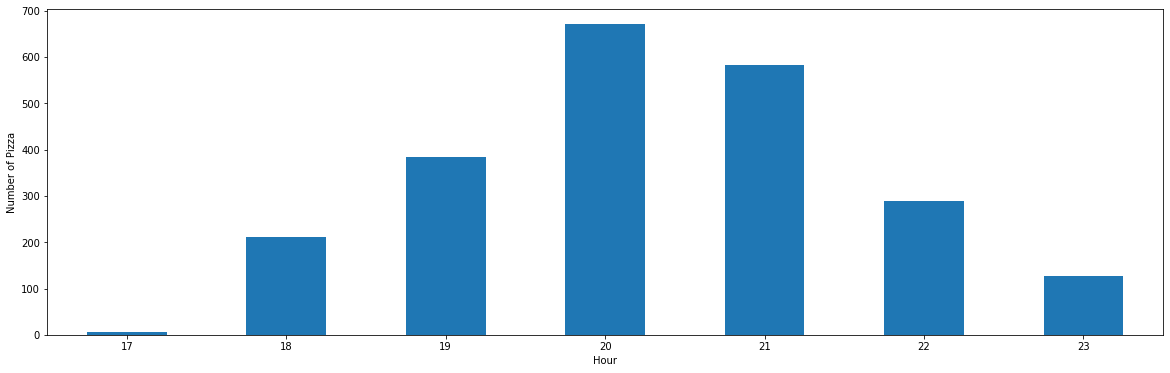

In [9]:
data['hora_pedido'].value_counts().sort_index().plot(kind='bar',figsize=(20,6), rot=0)
plt.xlabel('Hour')
plt.ylabel('Number of Pizza')

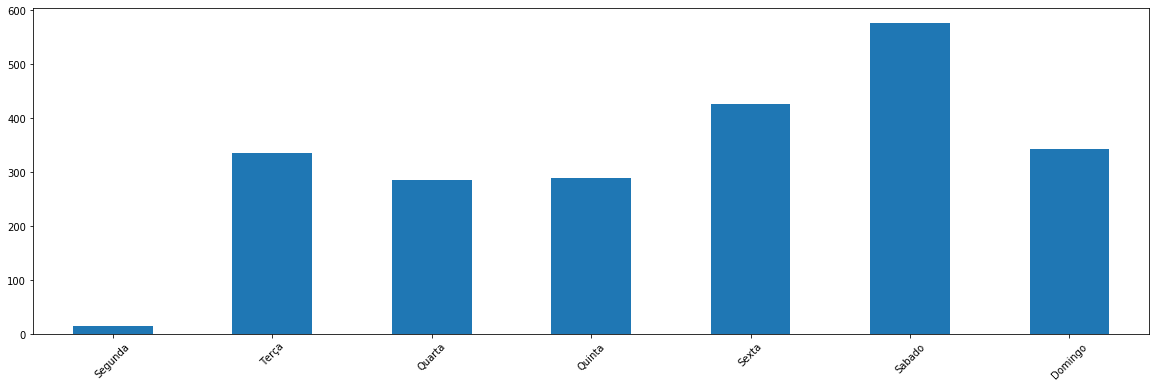

In [10]:
data['semana'] = pd.Categorical(data['semana'], categories=
    ['Segunda','Terça','Quarta','Quinta','Sexta','Sabado', 'Domingo'],
    ordered=True)
data['semana'].value_counts().sort_index().plot(kind='bar', figsize=(20,6), rot=45)

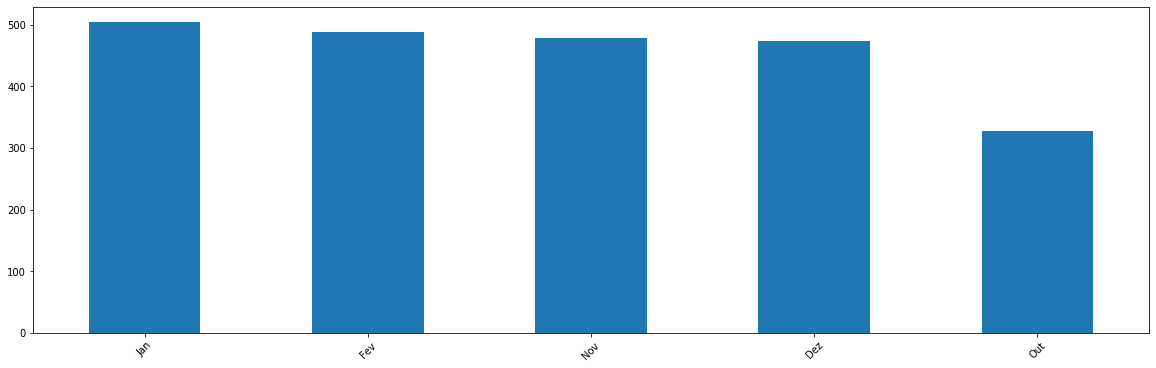

In [11]:
data['mes'].value_counts().plot(kind='bar',figsize=(20,6), rot=45)

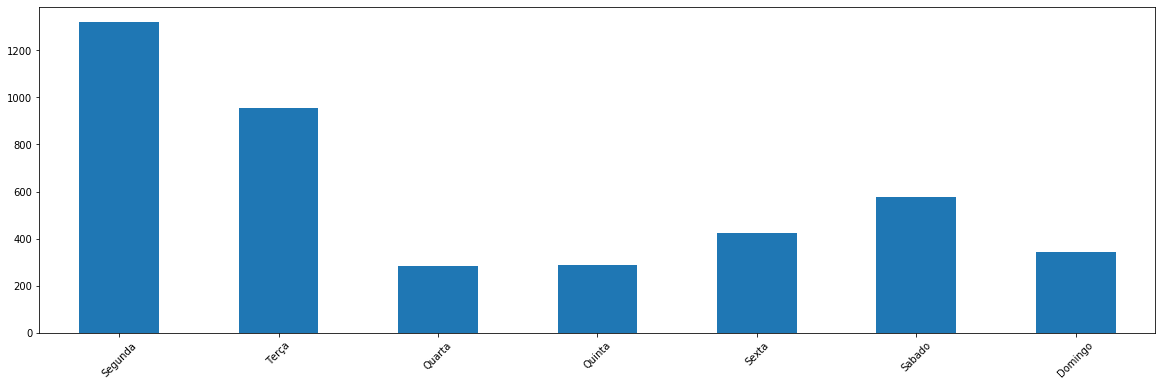

In [12]:
data['tipo_entrega'].value_counts().plot(kind='bar',figsize=(20,6), rot=45)

data['semana'] = pd.Categorical(data['semana'], categories=
    ['Segunda','Terça','Quarta','Quinta','Sexta','Sabado', 'Domingo'],
    ordered=True)
data['semana'].value_counts().sort_index().plot(kind='bar', figsize=(20,6), rot=45)

In [13]:
data.head()

,data_pedido,hora_pedido,tipo_entrega,borda,refrigerante,valor_total,tempo,ano,semana,mes
0,2011-10-07,18,Buscar,nao,nao,32.0,30,2011,Sexta,Out
1,2011-10-07,18,Buscar,nao,nao,30.0,43,2011,Sexta,Out
2,2011-10-07,18,Buscar,nao,nao,27.0,42,2011,Sexta,Out
3,2011-10-07,18,Buscar,nao,nao,30.0,40,2011,Sexta,Out
4,2011-10-07,18,Buscar,nao,nao,30.0,23,2011,Sexta,Out


In [14]:
# records removed  of year 2015
data = data[data['ano'] != 2015]

In [15]:
# Creating intevals to column " hora_pedido "
bins =  [   0,      18,   21,      np.inf]
names = ["inicio",  "pico",  "final_expediente"]
data['hora_pedido'] = pd.cut(data['hora_pedido'], bins, labels=names)

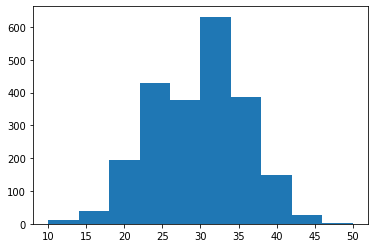

In [16]:
# Analyzing Distribution of " valor_total"
distribution = data['valor_total']
hist = plt.hist(distribution)

In [17]:
# intervals
hist[1]

array([10., 14., 18., 22., 26., 30., 34., 38., 42., 46., 50.])

In [18]:
# Creating intevals to column " valor_total "
bins =  [   10,      14,        18,          22,     26,       30,        34,       38,             42,            46, np.inf]
names = ["10-14",  "14-18",  "18-22",    "22-26",  "26-30",   "30-34",  "34-38",  "38-42",       "42-46",       "46-50"]
data['valor_total'] = pd.cut(data['valor_total'], bins, labels=names)

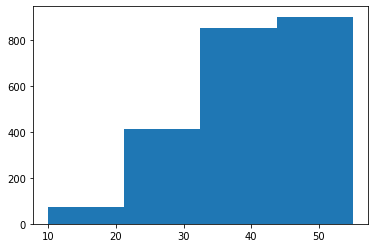

In [19]:
# Analyzing Distribution of " tempo "
distribution_tempo = data['tempo']
hist = plt.hist(distribution_tempo,bins=4)

In [20]:
# intervals
hist[1]

array([10.  , 21.25, 32.5 , 43.75, 55.  ])

In [21]:
# Creating intevals to column " tempo "
bins =  [   10,      22,        33,          44,      np.inf]
names = ["10-22",  "22-33",  "33-44",    "44-55"]
data['tempo'] = pd.cut(data['tempo'], bins, labels=names)

In [23]:
data.head()

,data_pedido,hora_pedido,tipo_entrega,borda,refrigerante,valor_total,tempo,ano,semana,mes
0,2011-10-07,inicio,Buscar,nao,nao,30-34,22-33,2011,Sexta,Out
1,2011-10-07,inicio,Buscar,nao,nao,26-30,33-44,2011,Sexta,Out
2,2011-10-07,inicio,Buscar,nao,nao,26-30,33-44,2011,Sexta,Out
3,2011-10-07,inicio,Buscar,nao,nao,26-30,33-44,2011,Sexta,Out
4,2011-10-07,inicio,Buscar,nao,nao,26-30,22-33,2011,Sexta,Out


In [28]:
from apyori import apriori

In [30]:
rules = apriori(data, min_support=0.3)
rules

<generator object apriori at 0x000001154A8E49C8>